In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [158]:
qLifeData =pd.read_csv("Quality_Of_Life_Data.csv", index_col= "Rank")
qLifeData

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
Rank,,,,,,,,,,
1,Luxembourg,220.1,184.3,65.8,75.2,64.8,8.6,27.0,23.3,82.6
2,Netherlands,211.3,134.5,73.1,79.3,60.5,7.7,23.5,21.6,87.2
3,Denmark,209.9,137.3,74.0,78.4,66.9,6.5,27.8,20.6,82.5
4,Oman,208.9,153.8,81.7,65.1,39.8,3.1,22.1,35.6,67.2
5,Switzerland,205.0,164.8,73.5,71.5,98.4,11.0,33.0,23.1,79.2
...,...,...,...,...,...,...,...,...,...,...
84,Egypt,85.3,21.4,52.7,47.3,19.0,18.2,48.0,82.7,92.0
85,Sri Lanka,81.1,18.5,57.9,71.4,33.5,34.2,54.5,57.9,59.1
86,Venezuela,79.7,16.0,19.3,38.7,35.9,15.1,32.8,75.1,99.9


In [97]:
df = qLifeData


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 1 to 88
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         88 non-null     object 
 1   Quality of Life Index           88 non-null     float64
 2   Purchasing Power Index          88 non-null     float64
 3   Safety Index                    88 non-null     float64
 4   Health Care Index               88 non-null     float64
 5   Cost of Living Index            88 non-null     float64
 6   Property Price to Income Ratio  88 non-null     float64
 7   Traffic Commute Time Index      88 non-null     float64
 8   Pollution Index                 88 non-null     float64
 9   Climate Index                   88 non-null     float64
dtypes: float64(9), object(1)
memory usage: 7.6+ KB


In [99]:
countries = df["Country"]

In [100]:
europe = ["Lithuania", "Belgium", "Portugal", "Ireland", "France", "Latvia", "Malta", "Hungary", "Bulgaria", "Romania", "Greece", "Bosnia and Herzegovina", "North Macedonia", "Albania", "Serbia", "Turkey", "Belarus", "Ukraine", "Russia", "Georgia", "Armenia"]
asia= ["Oman", "Qatar", "United Arab Emirates", "Saudi Arabia", "Japan", "Taiwan", "Israel", "Kuwait", "Cyprus", "Singapore", "South Korea", "Malaysia", "Jordan", "India", "China", "Kazakhstan", "Thailand", "Pakistan", "Indonesia", "Lebanon", "Philippines", "Vietnam", "Iran", "Sri Lanka"]
africa = ["South Africa", "Tunisia", "Morocco", "Egypt", "Kenya", "Nigeria"]
north_America = ["United States", "Canada", "Mexico", "Costa Rica", "Panama"]
south_America =[ "Uruguay", "Argentina", "Brazil", "Colombia", "Chile", "Peru", "Venezuela"]
Oceania = ["New Zealand", "Australia"]

In [101]:
europe_country = df[df["Country"].isin(europe)]
asia_country = df[df["Country"].isin(asia)]
africa_country = df[df["Country"].isin(africa)]
north_America_country = df[df["Country"].isin(north_America)]
south_America_country = df[df["Country"].isin(south_America)]
oceania_country = df[df["Country"].isin(Oceania)]

In [102]:
europe_country_data = europe_country.describe()
europe_country_data.loc["mean"]

,mean
Quality of Life Index,139.660
Purchasing Power Index,69.230
Safety Index,60.320
Health Care Index,60.085
Cost of Living Index,39.305
Property Price to Income Ratio,12.170
Traffic Commute Time Index,33.150
Pollution Index,54.440
Climate Index,80.215


In [103]:
africa_country_data = africa_country.describe()
africa_country_data.loc["mean"]

,mean
Quality of Life Index,98.166667
Purchasing Power Index,43.416667
Safety Index,43.750000
Health Care Index,54.366667
Cost of Living Index,26.050000
Property Price to Income Ratio,18.533333
Traffic Commute Time Index,45.183333
Pollution Index,72.500000
Climate Index,87.716667


In [104]:
asia_country_data = asia_country.describe()
asia_country_data.loc["mean"]

,mean
Quality of Life Index,136.275000
Purchasing Power Index,85.970833
Safety Index,66.191667
Health Care Index,67.720833
Cost of Living Index,38.962500
Property Price to Income Ratio,15.116667
Traffic Commute Time Index,37.250000
Pollution Index,64.229167
Climate Index,66.512500


In [105]:
north_America_data = north_America_country.describe()
north_America_data.loc["mean"]

,mean
Quality of Life Index,147.06
Purchasing Power Index,82.70
Safety Index,50.98
Health Care Index,66.80
Cost of Living Index,50.42
Property Price to Income Ratio,9.36
Traffic Commute Time Index,40.14
Pollution Index,44.50
Climate Index,77.78


In [106]:
south_America_data = south_America_country.describe()
south_America_data.loc["mean"]

,mean
Quality of Life Index,108.214286
Purchasing Power Index,40.642857
Safety Index,35.842857
Health Care Index,60.400000
Cost of Living Index,33.428571
Property Price to Income Ratio,16.157143
Traffic Commute Time Index,41.328571
Pollution Index,63.528571
Climate Index,97.128571


In [107]:
oceania_data = oceania_country.describe()
oceania_data.loc["mean"]

,mean
Quality of Life Index,192.35
Purchasing Power Index,137.20
Safety Index,52.25
Health Care Index,70.90
Cost of Living Index,58.10
Property Price to Income Ratio,7.70
Traffic Commute Time Index,34.80
Pollution Index,26.45
Climate Index,94.65


In [108]:
column_data = [["Europe", 139.660], ["Africa", 98.166667], ["Asia", 136.275000], ["North America", 147.06], ["South America", 108.214286], ["Oceania", 192.35]]

In [109]:
df_continent = pd.DataFrame(columns= ["Continent", "Quality of Life Index"])
df_continent
df_continent.set_index("Continent")

,Quality of Life Index
Continent,


In [110]:
for column in column_data:
  lenght = len(df_continent)
  df_continent.loc[lenght] = column

In [111]:
df_continent.set_index("Continent").sort_values(by = "Quality of Life Index", ascending= False)

,Quality of Life Index
Continent,
Oceania,192.350000
North America,147.060000
Europe,139.660000
Asia,136.275000
South America,108.214286
Africa,98.166667


<Axes: title={'center': 'Quality of life VS. Continent'}, xlabel='Continent', ylabel='Quality of Life Index'>

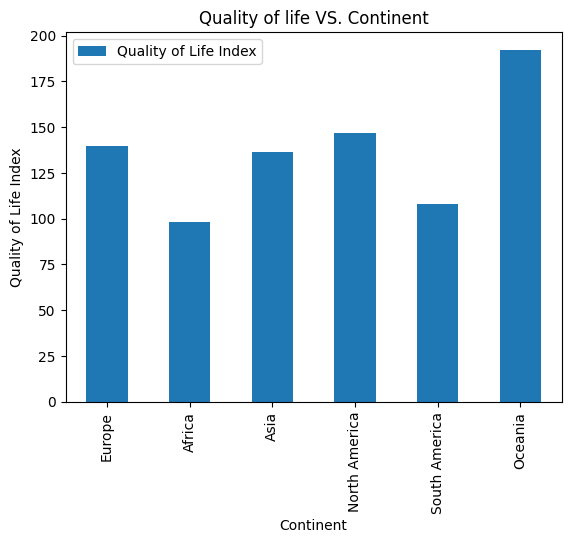

In [112]:
df_continent.plot(kind= "bar", x = "Continent", y = "Quality of Life Index", xlabel= "Continent", ylabel= "Quality of Life Index", title = "Quality of life VS. Continent")


In [113]:
europe_country
#africa_country
#asia_country
#north_America
#south_America
#oceania_data

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
Rank,,,,,,,,,,
25,Lithuania,173.0,81.8,67.6,75.0,44.0,12.4,23.6,26.3,67.8
26,Belgium,169.3,119.1,50.6,75.9,56.5,6.8,34.8,49.2,86.0
27,Portugal,167.8,61.9,67.9,72.2,41.2,14.7,28.5,28.8,97.3
28,Ireland,166.5,113.4,52.4,51.5,59.8,6.7,37.7,35.0,87.8
30,France,166.3,112.8,44.6,77.7,58.0,10.3,34.5,43.5,90.2
31,Latvia,164.7,77.2,62.9,62.4,43.4,8.6,28.7,30.3,74.7
42,Hungary,144.6,72.4,66.3,54.3,36.6,13.0,35.6,46.5,78.7
43,Bulgaria,143.8,76.0,63.9,58.1,35.4,9.3,29.2,62.8,82.8
44,Romania,142.2,74.7,67.7,56.5,34.0,10.3,33.4,58.7,76.2


<Axes: title={'center': 'Quality of Life Index for Europe'}, xlabel='Country'>

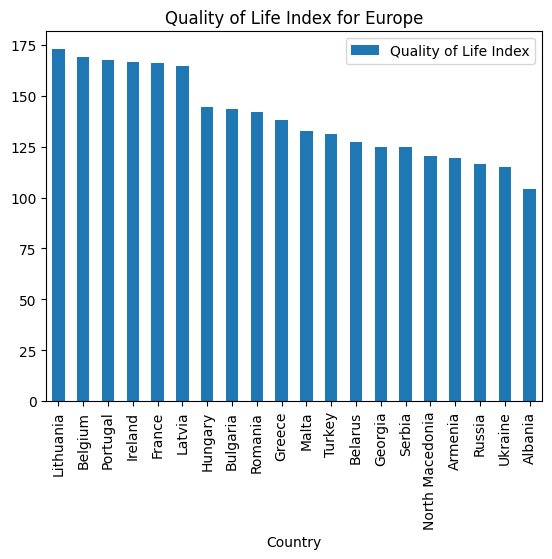

In [114]:
europe_country.plot(kind= 'bar', y = "Quality of Life Index", x = "Country", title="Quality of Life Index for Europe")

<Axes: title={'center': 'Quality of Life Index for Africa'}, xlabel='Country'>

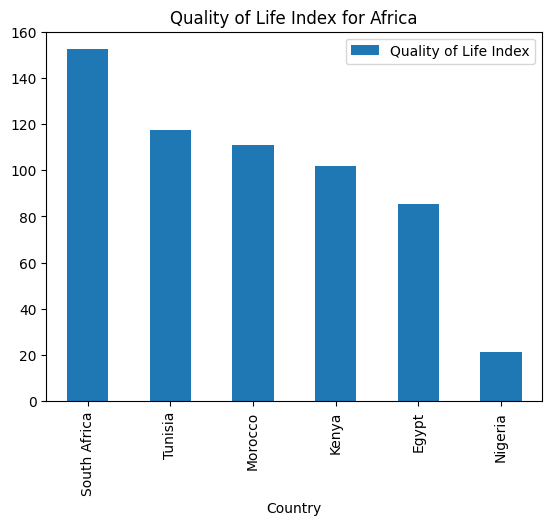

In [115]:
africa_country.plot(kind= 'bar', y = "Quality of Life Index", x = "Country", title="Quality of Life Index for Africa")

<Axes: title={'center': 'Quality of Life Index for Asia'}, xlabel='Country'>

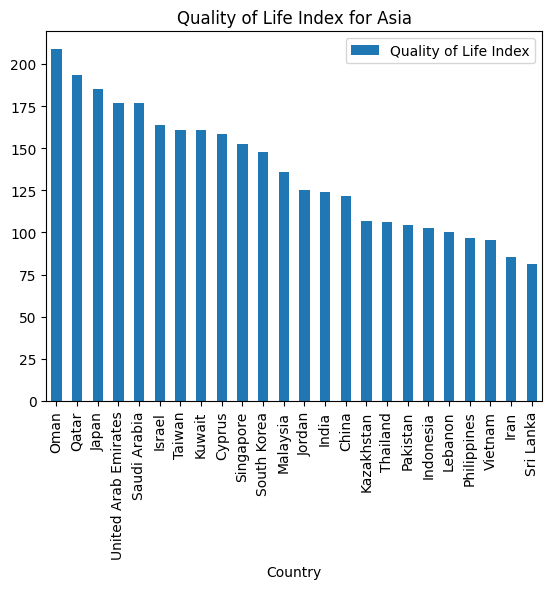

In [116]:
asia_country.plot(kind= 'bar', y = "Quality of Life Index", x = "Country", title="Quality of Life Index for Asia")

<Axes: title={'center': 'Quality of Life Index for North America'}, xlabel='Country'>

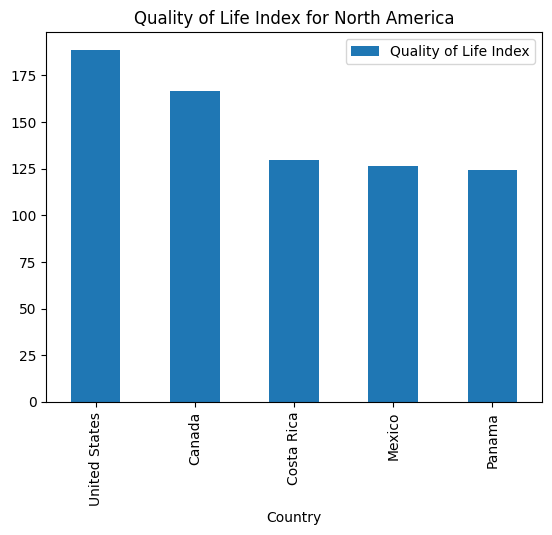

In [117]:
north_America_country.plot(kind= 'bar', y = "Quality of Life Index", x = "Country", title="Quality of Life Index for North America")




<Axes: title={'center': 'Quality of Life Index for South America'}, xlabel='Country'>

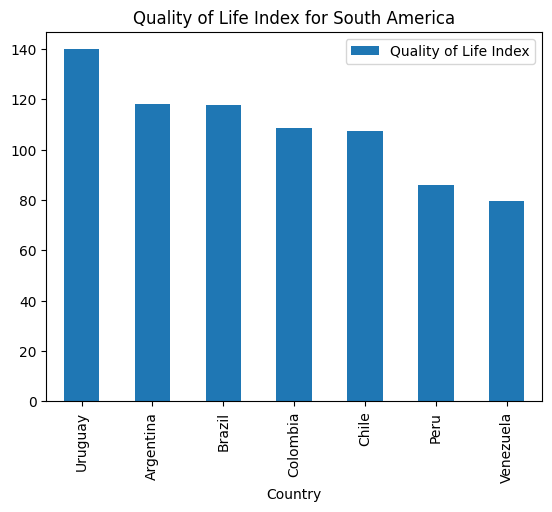

In [118]:
south_America_country.plot(kind= 'bar', y = "Quality of Life Index", x = "Country", title="Quality of Life Index for South America")

<Axes: title={'center': 'Quality of Life Index for Oceania'}, xlabel='Country'>

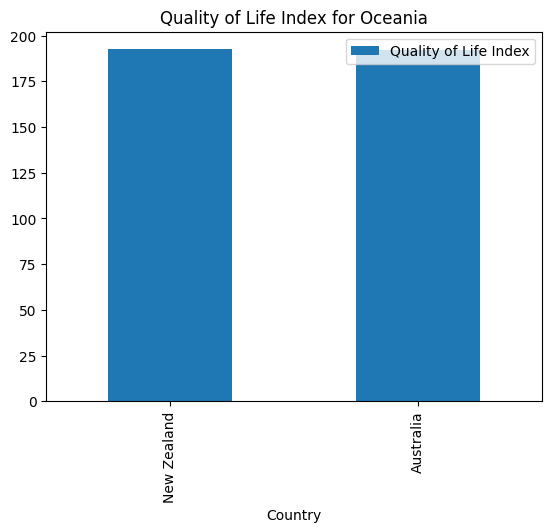

In [119]:

oceania_country.plot(kind= 'bar', y = "Quality of Life Index", x = "Country", title="Quality of Life Index for Oceania")


In [122]:
df1 = df
df1.reset_index(inplace=True)
df1

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,1,Luxembourg,220.1,184.3,65.8,75.2,64.8,8.6,27.0,23.3,82.6
1,2,Netherlands,211.3,134.5,73.1,79.3,60.5,7.7,23.5,21.6,87.2
2,3,Denmark,209.9,137.3,74.0,78.4,66.9,6.5,27.8,20.6,82.5
3,4,Oman,208.9,153.8,81.7,65.1,39.8,3.1,22.1,35.6,67.2
4,5,Switzerland,205.0,164.8,73.5,71.5,98.4,11.0,33.0,23.1,79.2
...,...,...,...,...,...,...,...,...,...,...,...
83,84,Egypt,85.3,21.4,52.7,47.3,19.0,18.2,48.0,82.7,92.0
84,85,Sri Lanka,81.1,18.5,57.9,71.4,33.5,34.2,54.5,57.9,59.1
85,86,Venezuela,79.7,16.0,19.3,38.7,35.9,15.1,32.8,75.1,99.9
86,87,Bangladesh,73.9,35.9,38.4,42.2,20.9,12.8,57.1,85.4,71.3


In [135]:
df1.drop(columns = "Rank", inplace= True)

In [136]:
df1.drop(columns = "Country", inplace= True)

In [156]:
df1

,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,184.3,65.8,75.2,64.8,8.6,27.0,23.3,82.6
1,134.5,73.1,79.3,60.5,7.7,23.5,21.6,87.2
2,137.3,74.0,78.4,66.9,6.5,27.8,20.6,82.5
3,153.8,81.7,65.1,39.8,3.1,22.1,35.6,67.2
4,164.8,73.5,71.5,98.4,11.0,33.0,23.1,79.2
...,...,...,...,...,...,...,...,...
83,21.4,52.7,47.3,19.0,18.2,48.0,82.7,92.0
84,18.5,57.9,71.4,33.5,34.2,54.5,57.9,59.1
85,16.0,19.3,38.7,35.9,15.1,32.8,75.1,99.9
86,35.9,38.4,42.2,20.9,12.8,57.1,85.4,71.3


In [143]:
df3 = df2

In [144]:
df3.drop(columns="Quality of Life Index", inplace= True)

In [145]:
corr_matrix = df3.corr()
corr_matrix

,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
Purchasing Power Index,1.000000,0.485472,0.525710,0.719872,-0.561244,-0.498692,-0.625546,-0.258270
Safety Index,0.485472,1.000000,0.385447,0.408220,-0.106584,-0.504120,-0.357164,-0.395651
Health Care Index,0.525710,0.385447,1.000000,0.511000,-0.131793,-0.251957,-0.539709,-0.045019
Cost of Living Index,0.719872,0.408220,0.511000,1.000000,-0.281455,-0.395181,-0.695162,0.019206
Property Price to Income Ratio,-0.561244,-0.106584,-0.131793,-0.281455,1.000000,0.534773,0.459183,-0.025647
Traffic Commute Time Index,-0.498692,-0.504120,-0.251957,-0.395181,0.534773,1.000000,0.542968,0.070376
Pollution Index,-0.625546,-0.357164,-0.539709,-0.695162,0.459183,0.542968,1.000000,0.004033
Climate Index,-0.258270,-0.395651,-0.045019,0.019206,-0.025647,0.070376,0.004033,1.000000


,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,184.3,65.8,75.2,64.8,8.6,27.0,23.3,82.6
1,134.5,73.1,79.3,60.5,7.7,23.5,21.6,87.2
2,137.3,74.0,78.4,66.9,6.5,27.8,20.6,82.5
3,153.8,81.7,65.1,39.8,3.1,22.1,35.6,67.2
4,164.8,73.5,71.5,98.4,11.0,33.0,23.1,79.2
...,...,...,...,...,...,...,...,...
83,21.4,52.7,47.3,19.0,18.2,48.0,82.7,92.0
84,18.5,57.9,71.4,33.5,34.2,54.5,57.9,59.1
85,16.0,19.3,38.7,35.9,15.1,32.8,75.1,99.9
86,35.9,38.4,42.2,20.9,12.8,57.1,85.4,71.3


In [163]:
Y = qLifeData['Quality of Life Index']
Y

,Quality of Life Index
Rank,
1,220.1
2,211.3
3,209.9
4,208.9
5,205.0
...,...
84,85.3
85,81.1
86,79.7


In [164]:
X = df2
X

,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,184.3,65.8,75.2,64.8,8.6,27.0,23.3,82.6
1,134.5,73.1,79.3,60.5,7.7,23.5,21.6,87.2
2,137.3,74.0,78.4,66.9,6.5,27.8,20.6,82.5
3,153.8,81.7,65.1,39.8,3.1,22.1,35.6,67.2
4,164.8,73.5,71.5,98.4,11.0,33.0,23.1,79.2
...,...,...,...,...,...,...,...,...
83,21.4,52.7,47.3,19.0,18.2,48.0,82.7,92.0
84,18.5,57.9,71.4,33.5,34.2,54.5,57.9,59.1
85,16.0,19.3,38.7,35.9,15.1,32.8,75.1,99.9
86,35.9,38.4,42.2,20.9,12.8,57.1,85.4,71.3


In [165]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [166]:
ln_model = linear_model.LinearRegression()

In [85]:
# Training and Testing the Linear Regression Model

In [167]:
ln_model.fit(X_train, Y_train)

LinearRegression()

In [168]:
Y_predict = ln_model.predict(X_test)
Y_predict

array([152.36974116, 185.8000969 ,  81.21863817, 120.35998635,
       139.81430071, 124.4717898 , 166.59477033, 110.74564658,
       119.68355224, 166.42332261,  21.45842468, 160.64533904,
        97.01927887, 106.11244988, 117.98773146, 138.11395689,
       128.58262482, 131.11177168])

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [178]:
k = 3  # Number of neighbors
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)



In [179]:
y_pred

array([162.2       , 175.7       ,  97.4       , 118.46666667,
       141.16666667, 122.03333333, 170.03333333, 111.7       ,
       114.1       , 193.7       ,  81.6       , 165.5       ,
       100.8       , 107.73333333, 117.66666667, 134.73333333,
       117.66666667, 125.4       ])

In [184]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 282.02
R² Score: 0.79


In [183]:
r2_score(Y_test, Y_predict)

0.9999965906513261